# Exercise 8. You are given a set of 4 images: tp1 101.png - tp1 104.png. For one of these images perform the segmentation of the text information. See the example in Figure 3. Some graphical elements can be segmented as well.

Hint: use edge detection and image filtering techniques. The next Matlab function can be useful
imdilate, imfill, bwconncomp, regionprops


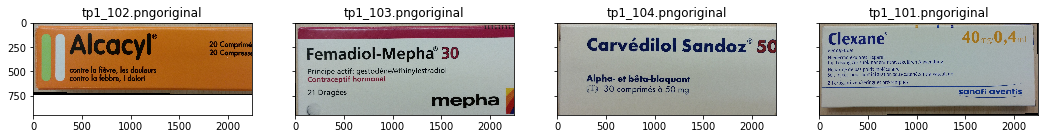

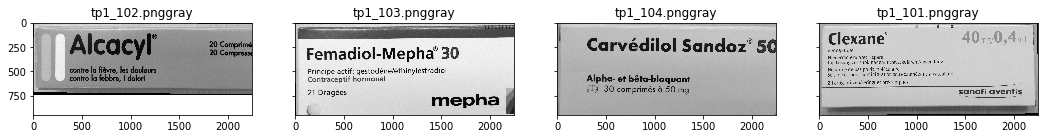

In [90]:
#TODO https://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import roberts, sobel, scharr, prewitt, gaussian
import os
import matplotlib.image as mpimg

class ImageType():
    def __init__(self, name, data):
        self.name = name
        self.data = data
        
def toGrayScale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def showImgs(images, title, colormap):
    fig, ax = plt.subplots(
        ncols=4, 
        sharex=True, 
        sharey=True,
        figsize=(18, 14)
    )
    
    for index, im in enumerate(images):
        ax[index].imshow(im.data, colormap)
        ax[index].set_title(im.name + title)


images = [
    ImageType(file, mpimg.imread("./data/" + file))
    for file in os.listdir("./data/") if file.startswith("tp1_")
]

images_gray = [
    ImageType(file, toGrayScale(mpimg.imread("./data/" + file)))
    for file in os.listdir("./data/") if file.startswith("tp1_")
]
showImgs(images, "original", plt.cm.Spectral)
showImgs(images_gray, "gray", "gray")

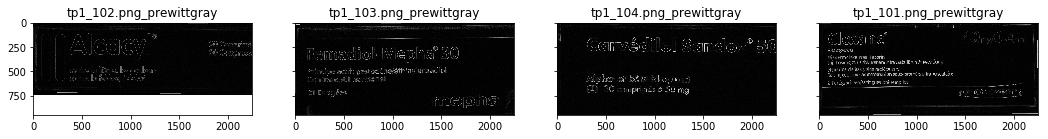

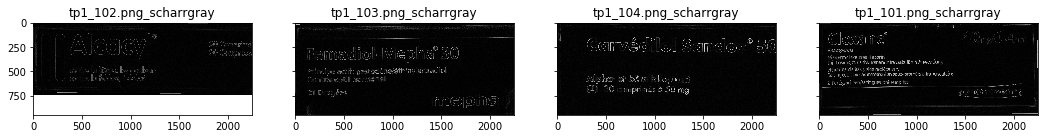

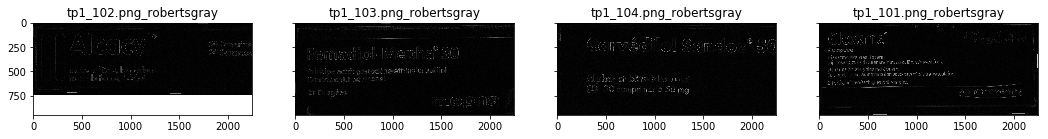

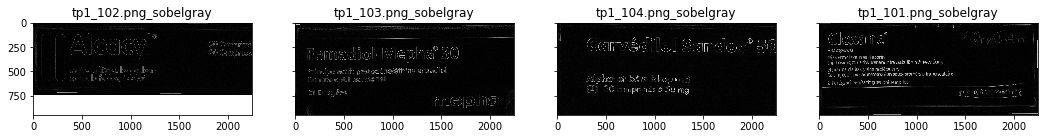

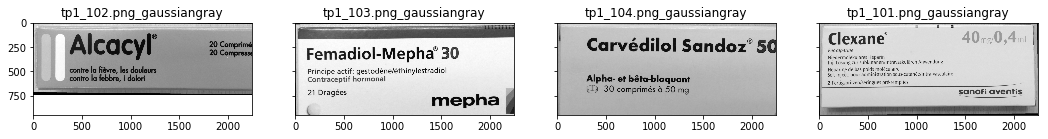

In [97]:

filtered = {}
for filter in [ prewitt,scharr, roberts, sobel, gaussian]:
    temp = [
        ImageType(im.name + "_" + filter.__name__, filter(im.data))
        for im in images_gray        
    ]
    filtered[filter.__name__] = temp
    showImgs(temp, "gray", "gray")